In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.stats.multitest as sm
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from scipy.stats import wilcoxon



In [2]:

data = pd.read_csv('/content/data_from_GC-MS.csv')

In [5]:

data.head()

,data_from_GC-MS,name,Blank1,Blank2,Blank3,Mito_atp4_1,Mito_atp4_2,Mito_atp4_3,Mito_sdh2_1,Mito_sdh2_2,...,Cyto_sdh2_1,Cyto_sdh2_2,Cyto_sdh2_3,Mito_WT_1,Mito_WT_2,Mito_WT_3,Cyto_WT_1,Cyto_WT_2,Cyto_WT_3,last_col
0,SC26_285mz_10.3051min,Blank1/MET1.ELU,1372.0,1388.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1,SC40_147mz_10.4225min,Blank1/MET1.ELU,13148.0,6588.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2,SC64_204mz_10.6205min,Blank1/MET1.ELU,132433.0,0.0,97173.0,115458.0,0.0,118294.0,175508.0,0.0,...,126849.0,96241.0,178638.0,131774.0,109091.0,109051.0,127581.0,95897.0,107141.0,2.0
3,SC133_113mz_11.201min,Blank1/MET1.ELU,5597.0,0.0,4366.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
4,SC854_211mz_17.2525min,Blank1/MET1.ELU,1019.0,595.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0


In [6]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data_from_GC-MS  3359 non-null   object 
 1   name             3359 non-null   object 
 2   Blank1           3359 non-null   float64
 3   Blank2           3359 non-null   float64
 4   Blank3           3359 non-null   float64
 5   Mito_atp4_1      3359 non-null   float64
 6   Mito_atp4_2      3359 non-null   float64
 7   Mito_atp4_3      3359 non-null   float64
 8   Mito_sdh2_1      3359 non-null   float64
 9   Mito_sdh2_2      3359 non-null   float64
 10  Mito_sdh2_3      3359 non-null   float64
 11  Cyto_atp4_1      3359 non-null   float64
 12  Cyto_atp4_2      3359 non-null   float64
 13  Cyto_atp4_3      3359 non-null   float64
 14  Cyto_sdh2_1      3359 non-null   float64
 15  Cyto_sdh2_2      3359 non-null   float64
 16  Cyto_sdh2_3      3359 non-null   float64
 17  Mito_WT_1     

In [129]:
prob_1 = pd.DataFrame(data[['Blank1','Mito_atp4_1', 'Mito_sdh2_1', 'Cyto_atp4_1', 'Cyto_sdh2_1', 'Mito_WT_1','Cyto_WT_1']])
prob_1.set_index(data['data_from_GC-MS'], inplace=True)

In [127]:
prob_2 = pd.DataFrame(data[['Blank2','Mito_atp4_2', 'Mito_sdh2_2', 'Cyto_atp4_2', 'Cyto_sdh2_2', 'Mito_WT_2','Cyto_WT_2']])
prob_2.set_index(data['data_from_GC-MS'], inplace=True)

In [128]:
prob_3 = pd.DataFrame(data[['Blank3','Mito_atp4_3', 'Mito_sdh2_3', 'Cyto_atp4_3', 'Cyto_sdh2_3', 'Mito_WT_3','Cyto_WT_3']])
prob_3.set_index(data['data_from_GC-MS'], inplace=True)

In [131]:
prob_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, SC26_285mz_10.3051min to SC4279_73mz_45.9828min
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Blank1       3359 non-null   float64
 1   Mito_atp4_1  3359 non-null   float64
 2   Mito_sdh2_1  3359 non-null   float64
 3   Cyto_atp4_1  3359 non-null   float64
 4   Cyto_sdh2_1  3359 non-null   float64
 5   Mito_WT_1    3359 non-null   float64
 6   Cyto_WT_1    3359 non-null   float64
dtypes: float64(7)
memory usage: 339.0+ KB


In [132]:
prob_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, SC26_285mz_10.3051min to SC4279_73mz_45.9828min
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Blank2       3359 non-null   float64
 1   Mito_atp4_2  3359 non-null   float64
 2   Mito_sdh2_2  3359 non-null   float64
 3   Cyto_atp4_2  3359 non-null   float64
 4   Cyto_sdh2_2  3359 non-null   float64
 5   Mito_WT_2    3359 non-null   float64
 6   Cyto_WT_2    3359 non-null   float64
dtypes: float64(7)
memory usage: 209.9+ KB


In [133]:
prob_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, SC26_285mz_10.3051min to SC4279_73mz_45.9828min
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Blank3       3359 non-null   float64
 1   Mito_atp4_3  3359 non-null   float64
 2   Mito_sdh2_3  3359 non-null   float64
 3   Cyto_atp4_3  3359 non-null   float64
 4   Cyto_sdh2_3  3359 non-null   float64
 5   Mito_WT_3    3359 non-null   float64
 6   Cyto_WT_3    3359 non-null   float64
dtypes: float64(7)
memory usage: 209.9+ KB


In [137]:
print("prob_1.columns: ", prob_1.columns)
print("prob_2.columns: ", prob_2.columns)
print("prob_3.columns: ", prob_3.columns)

prob_1.columns:  Index(['Blank1', 'Mito_atp4_1', 'Mito_sdh2_1', 'Cyto_atp4_1', 'Cyto_sdh2_1',
       'Mito_WT_1', 'Cyto_WT_1'],
      dtype='object')
prob_2.columns:  Index(['Blank2', 'Mito_atp4_2', 'Mito_sdh2_2', 'Cyto_atp4_2', 'Cyto_sdh2_2',
       'Mito_WT_2', 'Cyto_WT_2'],
      dtype='object')
prob_3.columns:  Index(['Blank3', 'Mito_atp4_3', 'Mito_sdh2_3', 'Cyto_atp4_3', 'Cyto_sdh2_3',
       'Mito_WT_3', 'Cyto_WT_3'],
      dtype='object')



Summary Statistics for Problem Blank:
|       |          Blank1 |      Mito_atp4_1 |      Mito_sdh2_1 |    Cyto_atp4_1 |    Cyto_sdh2_1 |        Mito_WT_1 |      Cyto_WT_1 |
|:------|----------------:|-----------------:|-----------------:|---------------:|---------------:|-----------------:|---------------:|
| count |  3359           |   3359           |   3359           | 3359           | 3359           |   3359           | 3359           |
| mean  | 66920.2         | 309104           | 263755           |    1.78702e+06 |    1.81921e+06 | 454080           |    2.23784e+06 |
| std   |     1.54569e+06 |      5.31155e+06 |      4.94258e+06 |    2.49493e+07 |    2.63148e+07 |      7.89946e+06 |    2.96395e+07 |
| min   |     0           |      0           |      0           |    0           |    0           |      0           |    0           |
| 25%   |     0           |      0           |      0           |    0           |    0           |      0           |    0           |
| 50%   |

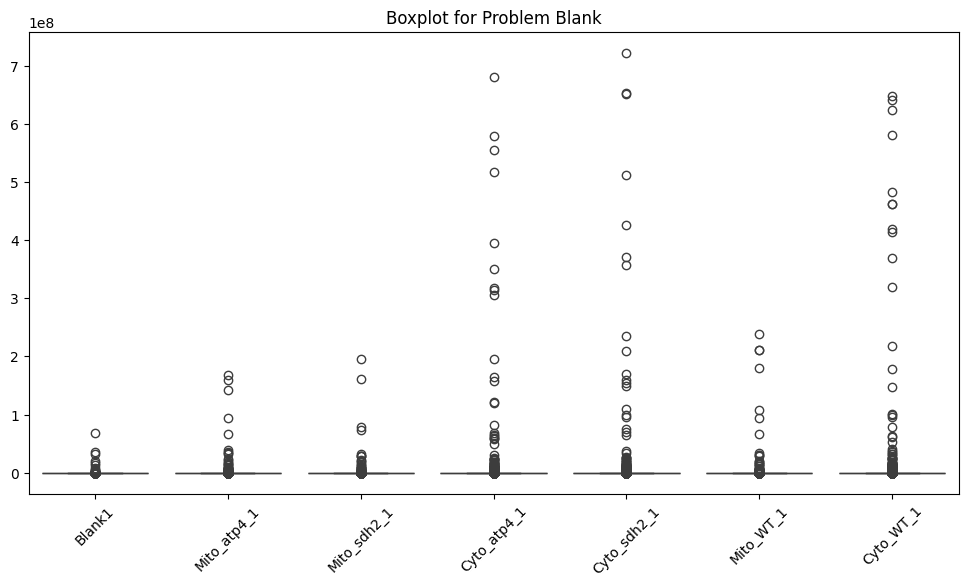

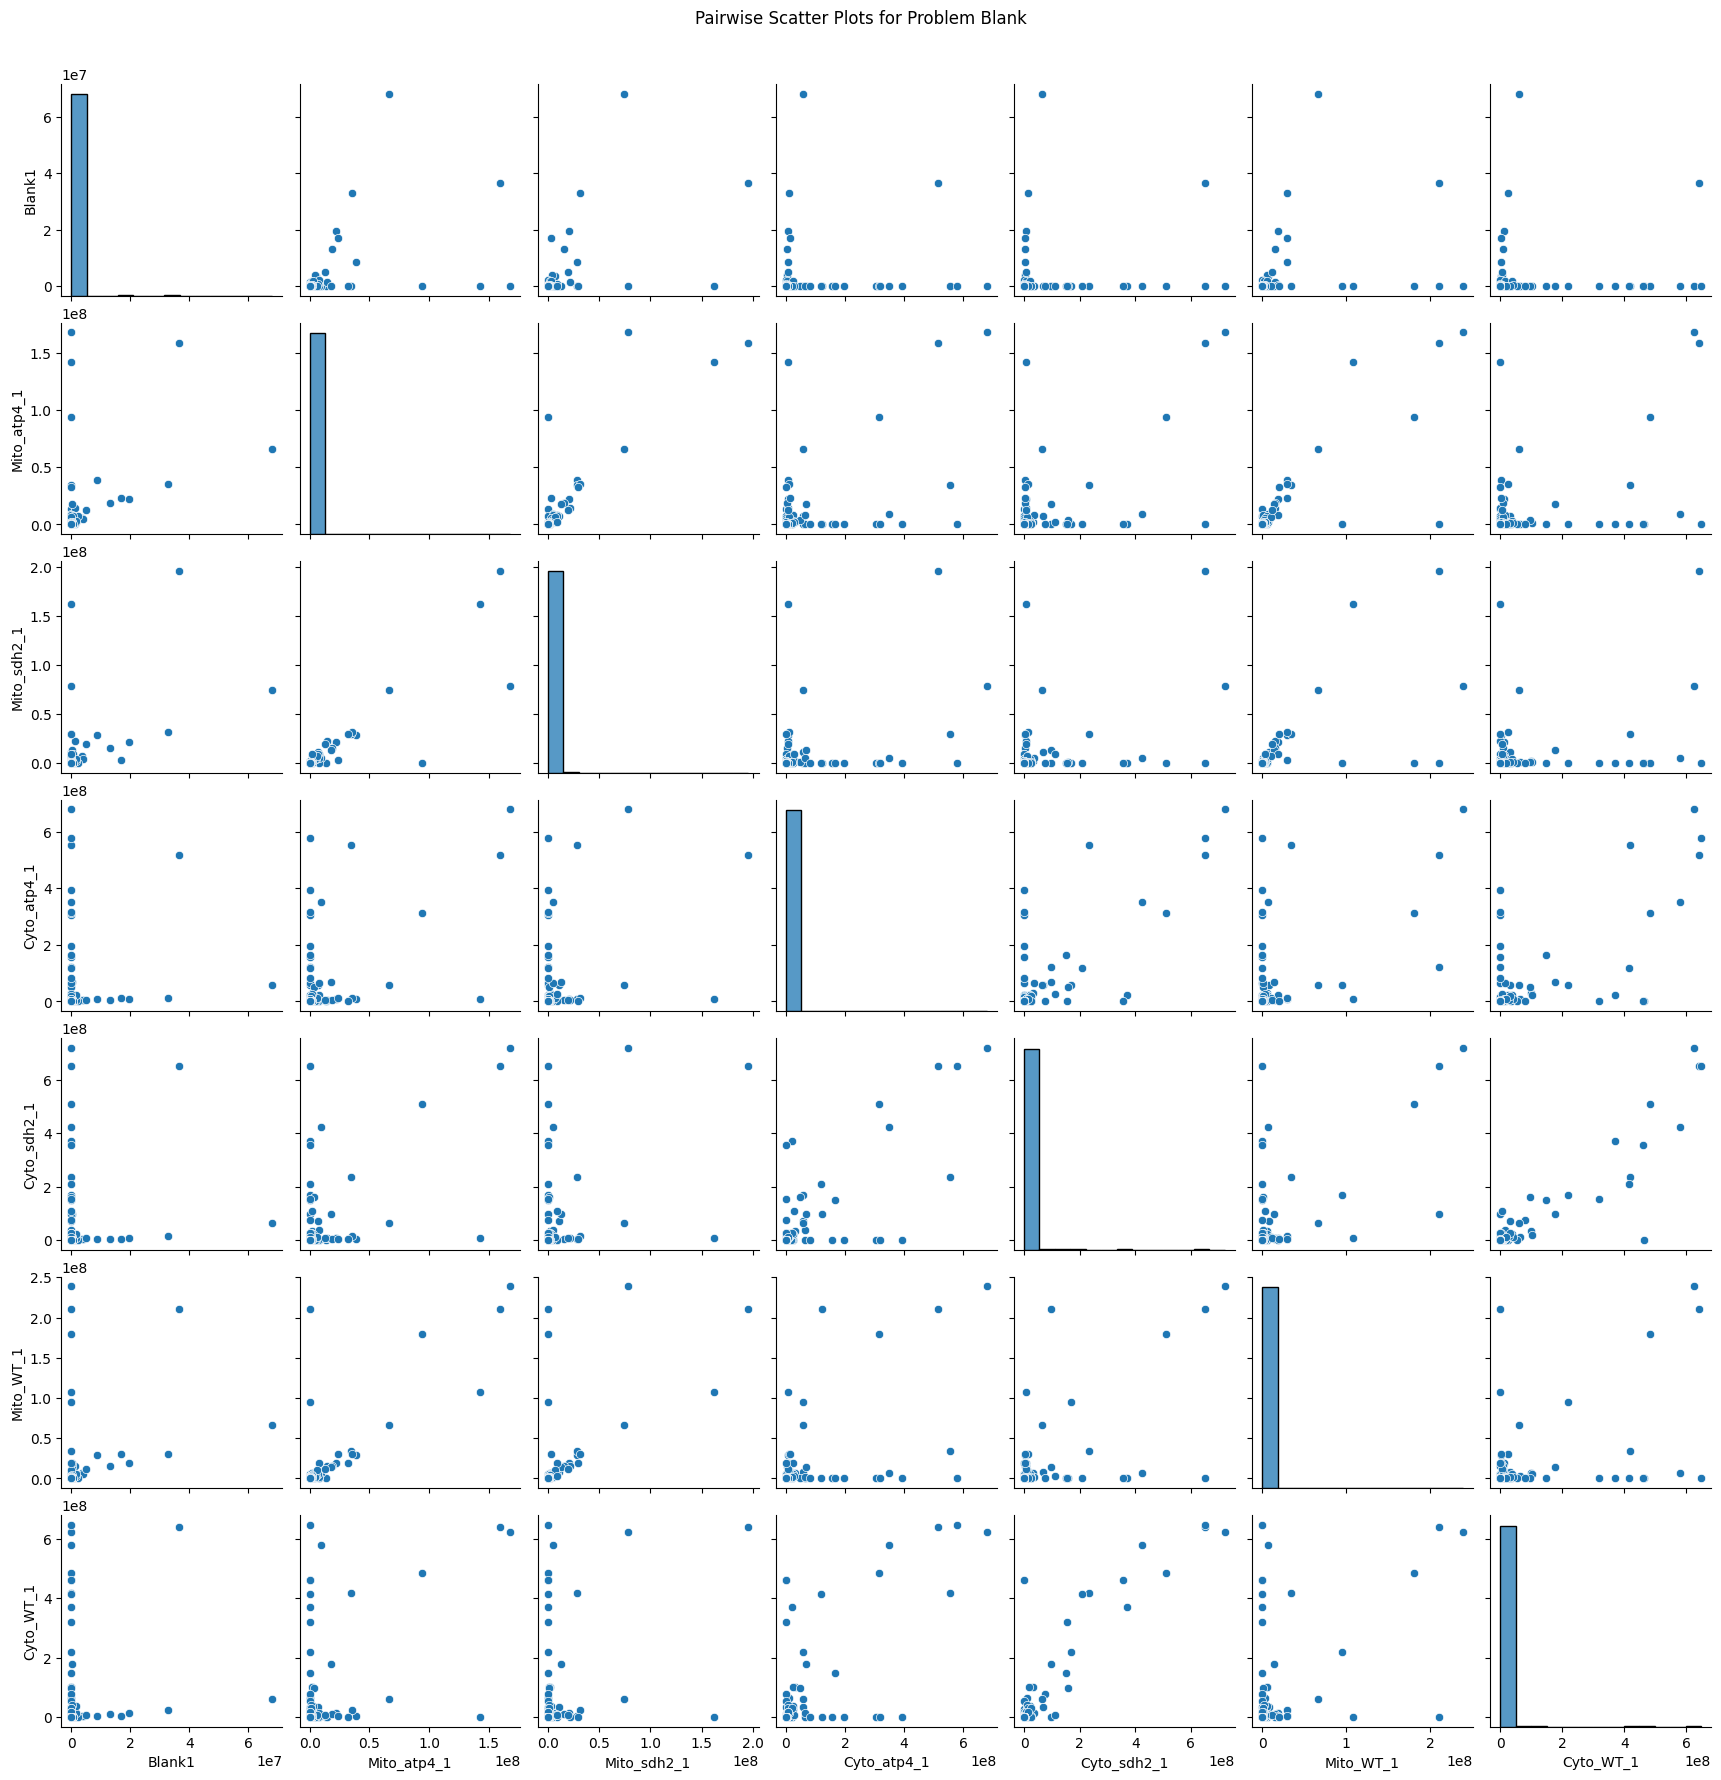


Summary Statistics for Problem Blank:
|       |          Blank2 |      Mito_atp4_2 |      Mito_sdh2_2 |    Cyto_atp4_2 |    Cyto_sdh2_2 |        Mito_WT_2 |      Cyto_WT_2 |
|:------|----------------:|-----------------:|-----------------:|---------------:|---------------:|-----------------:|---------------:|
| count |  3359           |   3359           |   3359           | 3359           | 3359           |   3359           | 3359           |
| mean  | 61497.4         | 272449           | 327155           |    1.65169e+06 |    1.65812e+06 | 449837           |    1.89065e+06 |
| std   |     1.49458e+06 |      4.79253e+06 |      5.69966e+06 |    2.43118e+07 |    2.50908e+07 |      8.05676e+06 |    2.58749e+07 |
| min   |     0           |      0           |      0           |    0           |    0           |      0           |    0           |
| 25%   |     0           |      0           |      0           |    0           |    0           |      0           |    0           |
| 50%   |

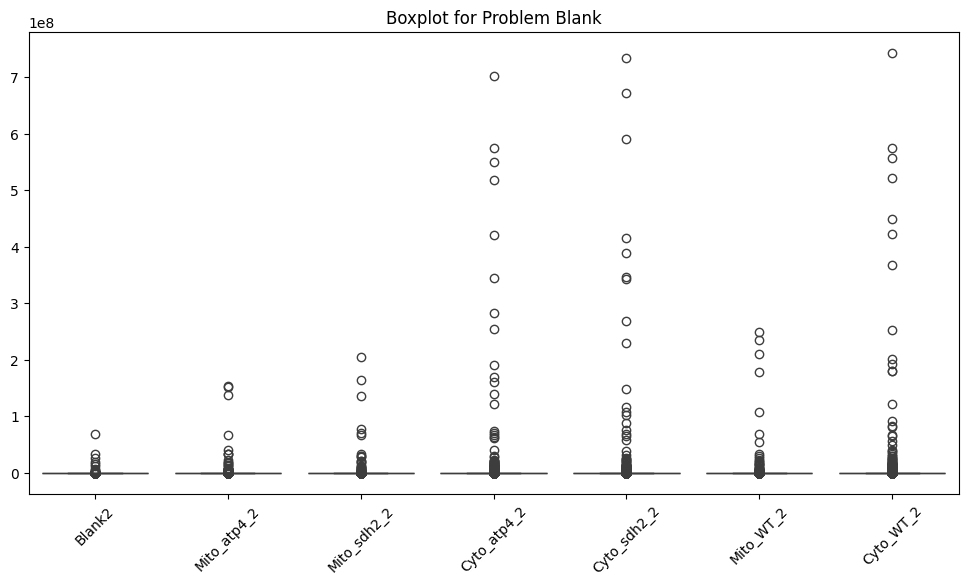

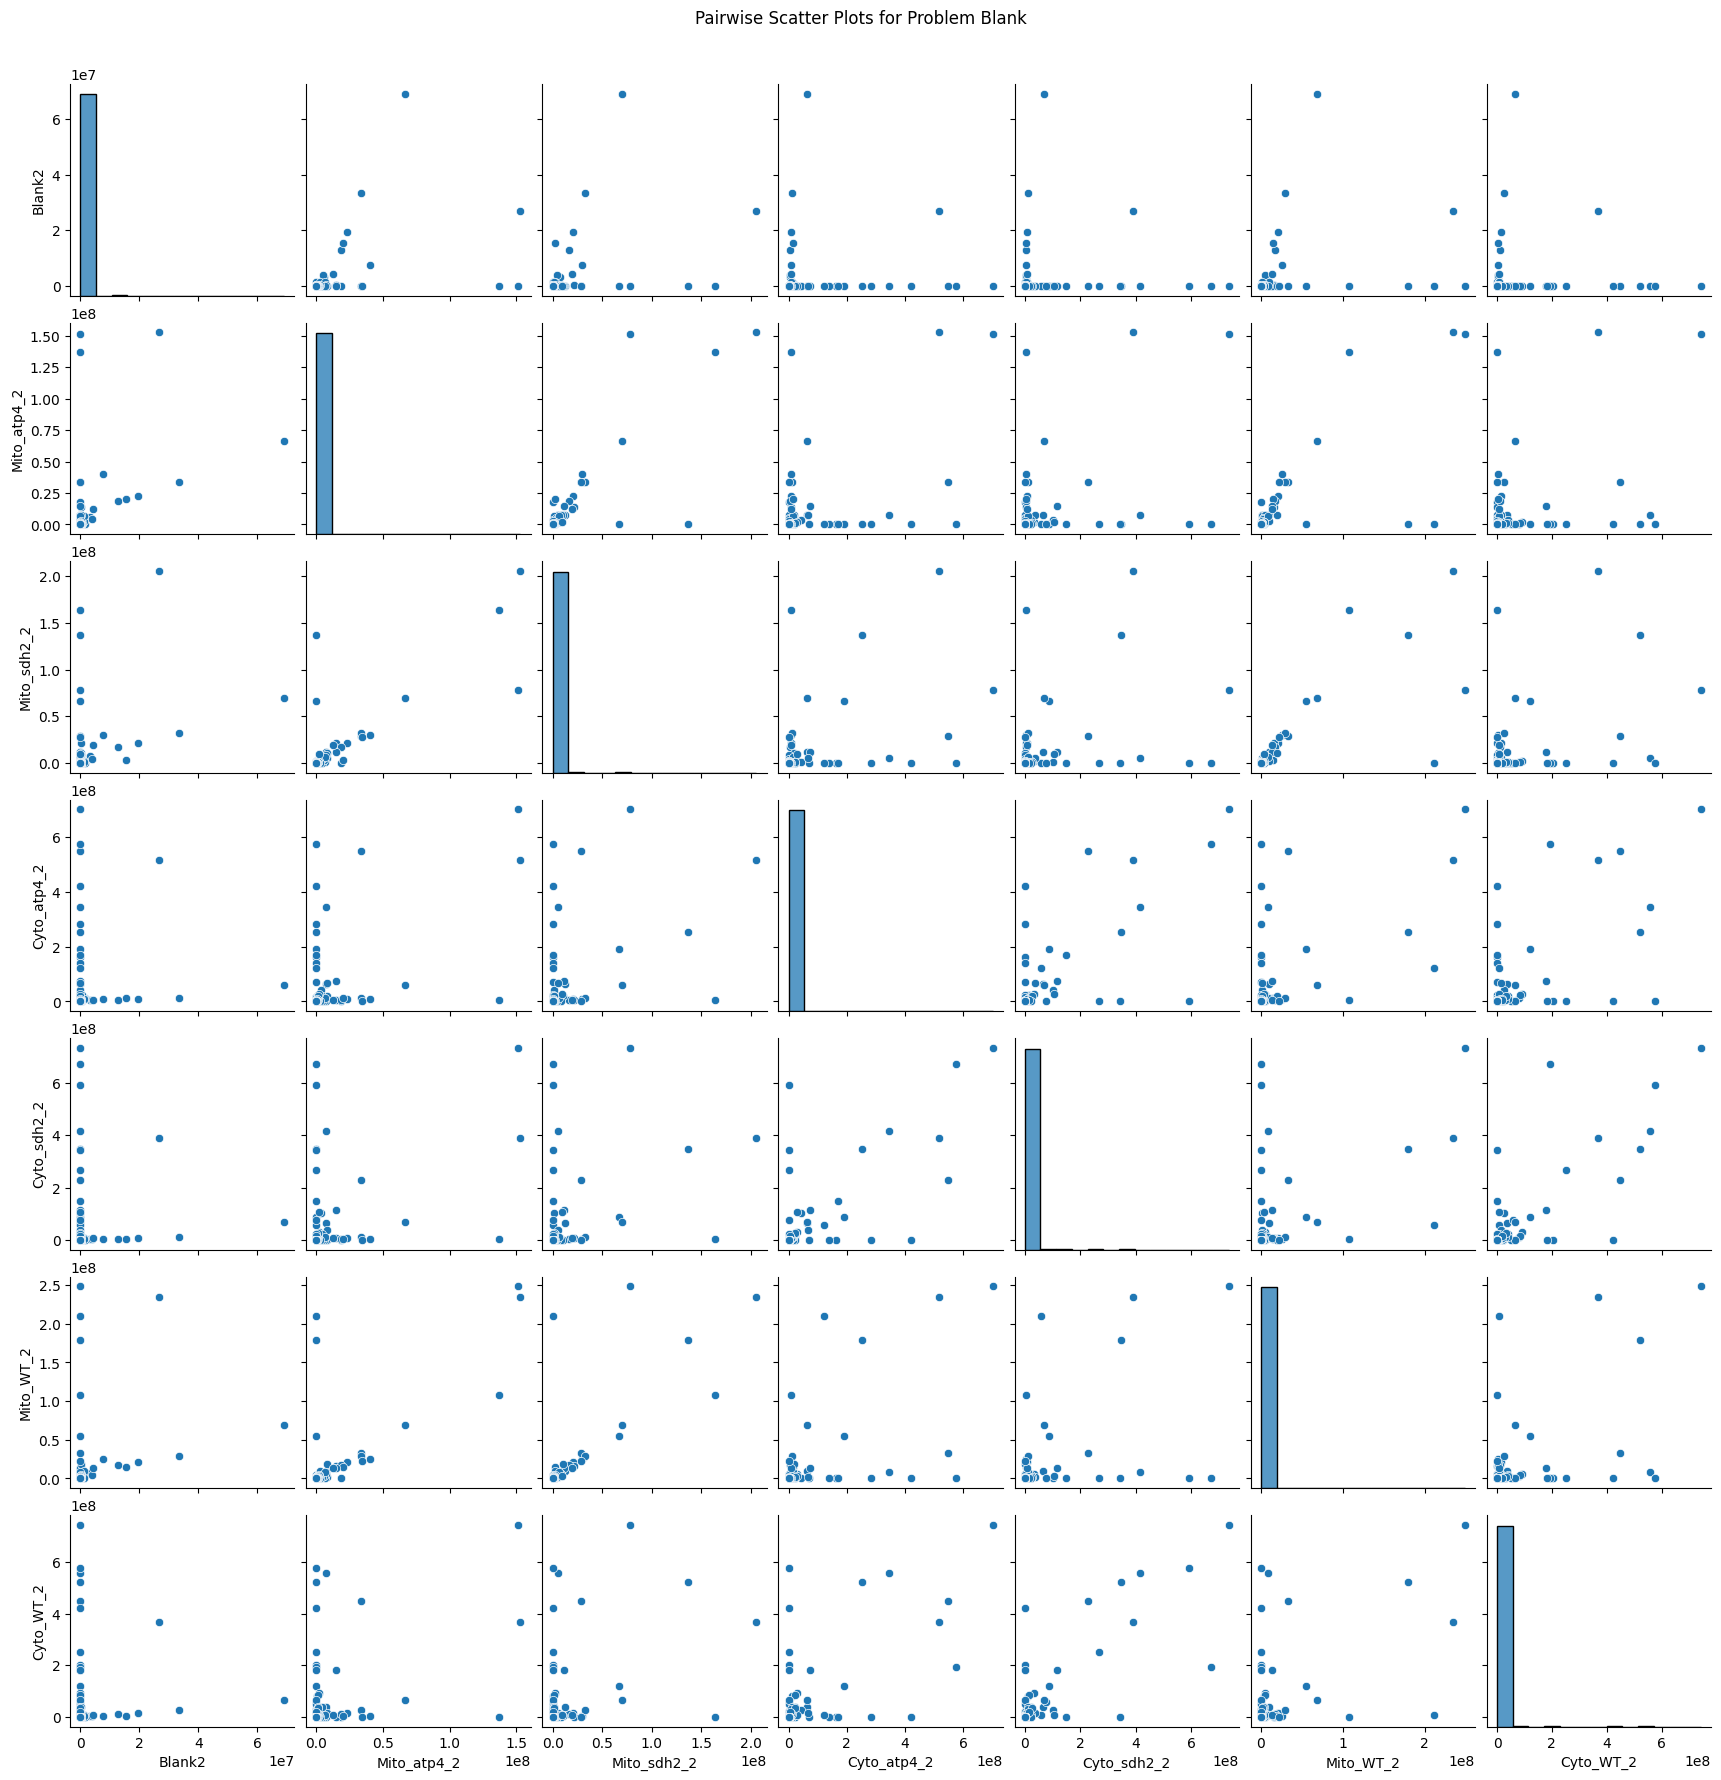


Summary Statistics for Problem Blank:
|       |          Blank3 |      Mito_atp4_3 |      Mito_sdh2_3 |    Cyto_atp4_3 |    Cyto_sdh2_3 |        Mito_WT_3 |      Cyto_WT_3 |
|:------|----------------:|-----------------:|-----------------:|---------------:|---------------:|-----------------:|---------------:|
| count |  3359           |   3359           |   3359           | 3359           | 3359           |   3359           | 3359           |
| mean  | 59701.3         | 258291           | 274743           |    2.05224e+06 |    1.57757e+06 | 323182           |    1.86073e+06 |
| std   |     1.42314e+06 |      4.5798e+06  |      4.99265e+06 |    2.71762e+07 |    2.45688e+07 |      5.83863e+06 |    2.66315e+07 |
| min   |     0           |      0           |      0           |    0           |    0           |      0           |    0           |
| 25%   |     0           |      0           |      0           |    0           |    0           |      0           |    0           |
| 50%   |

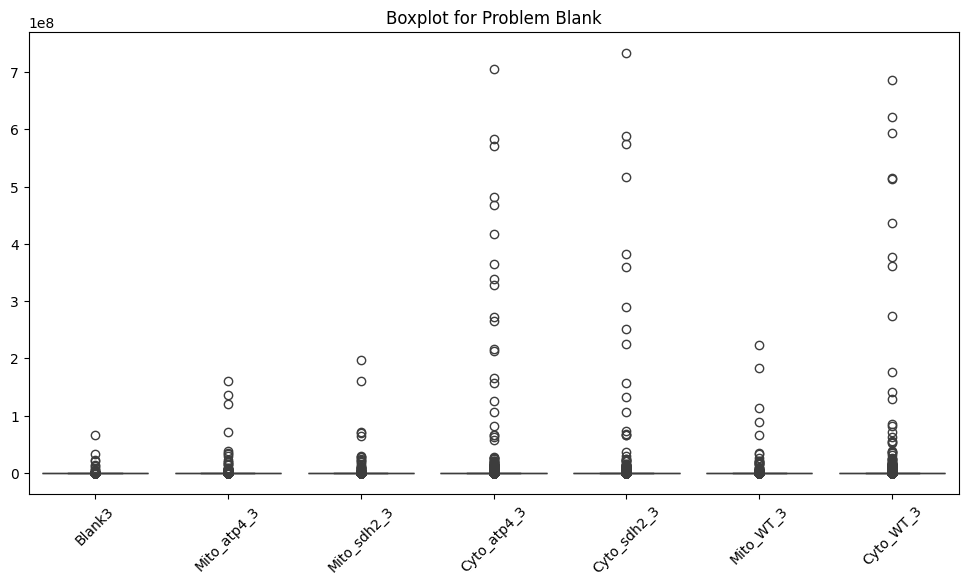

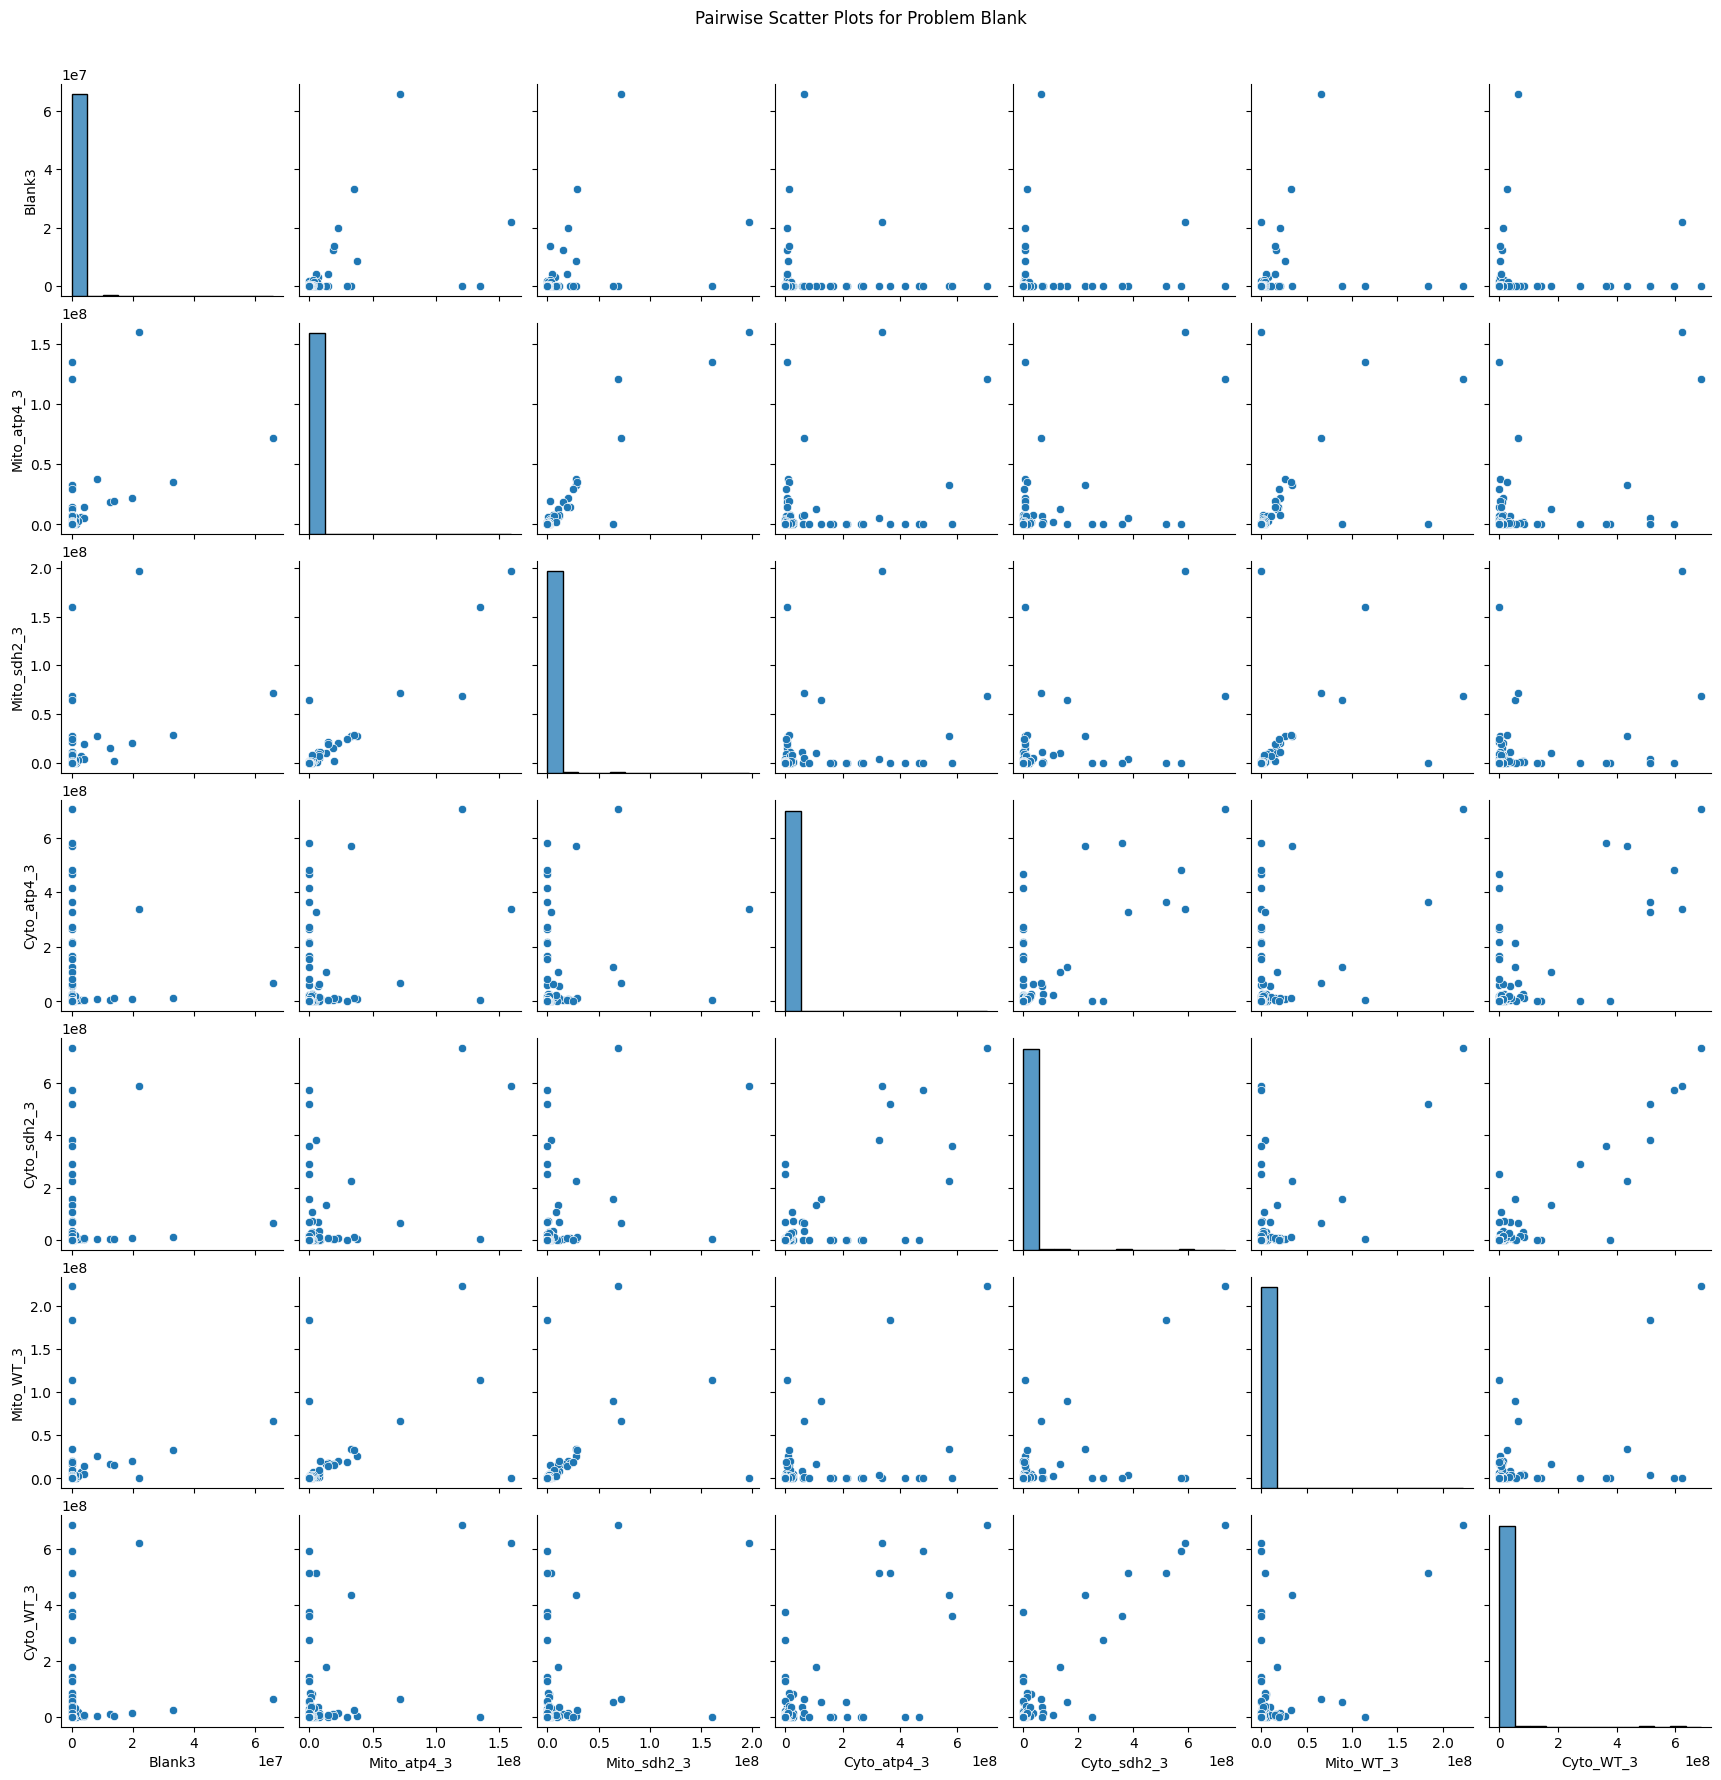

In [138]:
for prob in [prob_1, prob_2, prob_3]:
    print(f"\nSummary Statistics for Problem {prob.columns[0][:-1]}:")  # Extract problem number from column name
    print(prob.describe().to_markdown())

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=prob)
    plt.title(f'Boxplot for Problem {prob.columns[0][:-1]}')
    plt.xticks(rotation=45)
    plt.show()

    # Pairwise scatter plots (optional, but useful for larger datasets)
    sns.pairplot(prob)
    plt.suptitle(f'Pairwise Scatter Plots for Problem {prob.columns[0][:-1]}', y=1.02)
    plt.show()


In [145]:

# Iterate through problems and perform t-tests
for problem_num, df in enumerate([prob_1, prob_2, prob_3], start=1):
    blank_col = blank_columns[problem_num]
    for col in df.columns:
        if col != blank_col:  # Skip the blank column
            condition = '_'.join(col.split('_')[:2])  # Extract condition name
            atp4_col = condition.split('_')[0] + '_atp4_' + str(problem_num)  # Construct wild-type column name
            t_stat, p_val = ttest_ind(df[col], df[atp4_col])
            t_test_results.append({
                'Problem': problem_num,
                'Compound': col,
                'Comparison': f'{col} vs {atp4_col}',
                't_statistic': t_stat,
                'p_value': p_val
            })

# Create DataFrame from results
t_test_results_df = pd.DataFrame(t_test_results)

# Adjust p-values
_, adjusted_p_values, _, _ = sm.multipletests(t_test_results_df['p_value'], method='fdr_bh')
t_test_results_df['adjusted_p_value'] = adjusted_p_values

# Filter significant results
significant_results = t_test_results_df[t_test_results_df['adjusted_p_value'] < 0.05]

# Display results
if not significant_results.empty:
    print("Significant results using t-test:")
    print(significant_results.to_markdown(index=False, numalign="left", stralign="left"))
else:
    print("No significant results found.")


No significant results found.


In [146]:

# Iterate through problems and perform t-tests
for problem_num, df in enumerate([prob_1, prob_2, prob_3], start=1):
    blank_col = blank_columns[problem_num]
    for col in df.columns:
        if col != blank_col:  # Skip the blank column
            condition = '_'.join(col.split('_')[:2])  # Extract condition name
            wt_col = condition.split('_')[0] + '_WT_' + str(problem_num)  # Construct wild-type column name
            t_stat, p_val = ttest_ind(df[col], df[wt_col])
            t_test_results.append({
                'Problem': problem_num,
                'Compound': col,
                'Comparison': f'{col} vs {wt_col}',
                't_statistic': t_stat,
                'p_value': p_val
            })

# Create DataFrame from results
t_test_results_df = pd.DataFrame(t_test_results)

# Adjust p-values
_, adjusted_p_values, _, _ = sm.multipletests(t_test_results_df['p_value'], method='fdr_bh')
t_test_results_df['adjusted_p_value'] = adjusted_p_values

# Filter significant results
significant_results = t_test_results_df[t_test_results_df['adjusted_p_value'] < 0.05]

# Display results
if not significant_results.empty:
    print("Significant results using t-test:")
    print(significant_results.to_markdown(index=False, numalign="left", stralign="left"))
else:
    print("No significant results found.")


No significant results found.


In [147]:

# Iterate through problems and perform t-tests
for problem_num, df in enumerate([prob_1, prob_2, prob_3], start=1):
    blank_col = blank_columns[problem_num]
    for col in df.columns:
        if col != blank_col:  # Skip the blank column
            condition = '_'.join(col.split('_')[:2])  # Extract condition name
            sdh2_col = condition.split('_')[0] + '_sdh2_' + str(problem_num)  # Construct wild-type column name
            t_stat, p_val = ttest_ind(df[col], df[sdh2_col])
            t_test_results.append({
                'Problem': problem_num,
                'Compound': col,
                'Comparison': f'{col} vs {sdh2_col}',
                't_statistic': t_stat,
                'p_value': p_val
            })

# Create DataFrame from results
t_test_results_df = pd.DataFrame(t_test_results)

# Adjust p-values
_, adjusted_p_values, _, _ = sm.multipletests(t_test_results_df['p_value'], method='fdr_bh')
t_test_results_df['adjusted_p_value'] = adjusted_p_values

# Filter significant results
significant_results = t_test_results_df[t_test_results_df['adjusted_p_value'] < 0.05]

# Display results
if not significant_results.empty:
    print("Significant results using t-test:")
    print(significant_results.to_markdown(index=False, numalign="left", stralign="left"))
else:
    print("No significant results found.")


No significant results found.


In [153]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
import statsmodels.stats.multitest as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Define DataFrames for each problem
prob_1 = data.filter(regex='^data_from_GC-MS|^Blank1|^Mito_atp4_1|^Mito_sdh2_1|^Cyto_atp4_1|^Cyto_sdh2_1|^Mito_WT_1|^Cyto_WT_1')
prob_2 = data.filter(regex='^data_from_GC-MS|^Blank2|^Mito_atp4_2|^Mito_sdh2_2|^Cyto_atp4_2|^Cyto_sdh2_2|^Mito_WT_2|^Cyto_WT_2')
prob_3 = data.filter(regex='^data_from_GC-MS|^Blank3|^Mito_atp4_3|^Mito_sdh2_3|^Cyto_atp4_3|^Cyto_sdh2_3|^Mito_WT_3|^Cyto_WT_3')

# Set index to 'data_from_GC-MS'
prob_1.set_index('data_from_GC-MS', inplace=True)
prob_2.set_index('data_from_GC-MS', inplace=True)
prob_3.set_index('data_from_GC-MS', inplace=True)

# Create a dictionary mapping problem numbers to blank columns
blank_columns = {1: 'Blank1', 2: 'Blank2', 3: 'Blank3'}

# Function to perform both t-test and Mann-Whitney U test and adjust p-values
def analyze_problem(df, problem_name, test_func, test_name):
    results = []
    for col in df.columns:
        if col != blank_columns[problem_name]:
            condition = '_'.join(col.split('_')[:2])
            wt_col = condition.split('_')[0] + '_WT_' + str(problem_name)
            statistic, p_val = test_func(df[col].values, df[wt_col].values)  # Pass values, not Series
            results.append({
                'Problem': problem_name,
                'Compound': col,
                'Comparison': f'{col} vs {wt_col}',
                f'{test_name}_statistic': statistic,
                'p_value': p_val
            })

    results_df = pd.DataFrame(results)

    # Adjust p-values
    _, adjusted_p_values, _, _ = sm.multipletests(results_df['p_value'], method='fdr_bh')
    results_df['adjusted_p_value'] = adjusted_p_values

    # Filter significant results
    significant_results = results_df[results_df['adjusted_p_value'] < 0.05]

    return significant_results

# Perform and display results for both tests
for problem_num, df in enumerate([prob_1, prob_2, prob_3], start=1):
    print(f"\nFor problem {problem_num}:")
    significant_t_test_results = analyze_problem(df, problem_num, ttest_ind, 't')
    significant_mannwhitneyu_results = analyze_problem(df, problem_num, mannwhitneyu, 'u')

    if not significant_t_test_results.empty:
        print("\nSignificant results using t-test:")
        print(significant_t_test_results.to_markdown(index=False, numalign="left", stralign="left"))
    else:
        print("No significant results found using t-test.")

    if not significant_mannwhitneyu_results.empty:
        print("\nSignificant results using Mann-Whitney U test:")
        print(significant_mannwhitneyu_results.to_markdown(index=False, numalign="left", stralign="left"))
    else:
        print("No significant results found using Mann-Whitney U test.")



For problem 1:
No significant results found using t-test.
No significant results found using Mann-Whitney U test.

For problem 2:
No significant results found using t-test.
No significant results found using Mann-Whitney U test.

For problem 3:
No significant results found using t-test.
No significant results found using Mann-Whitney U test.


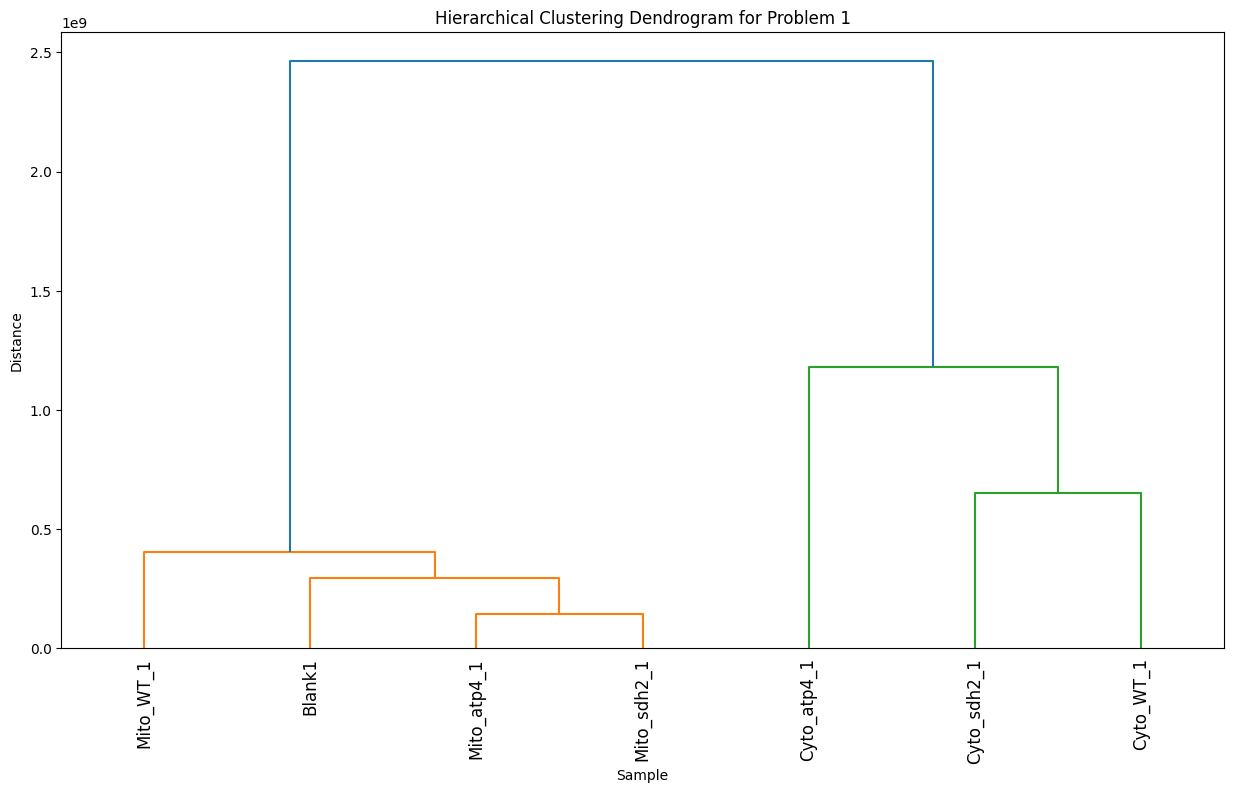

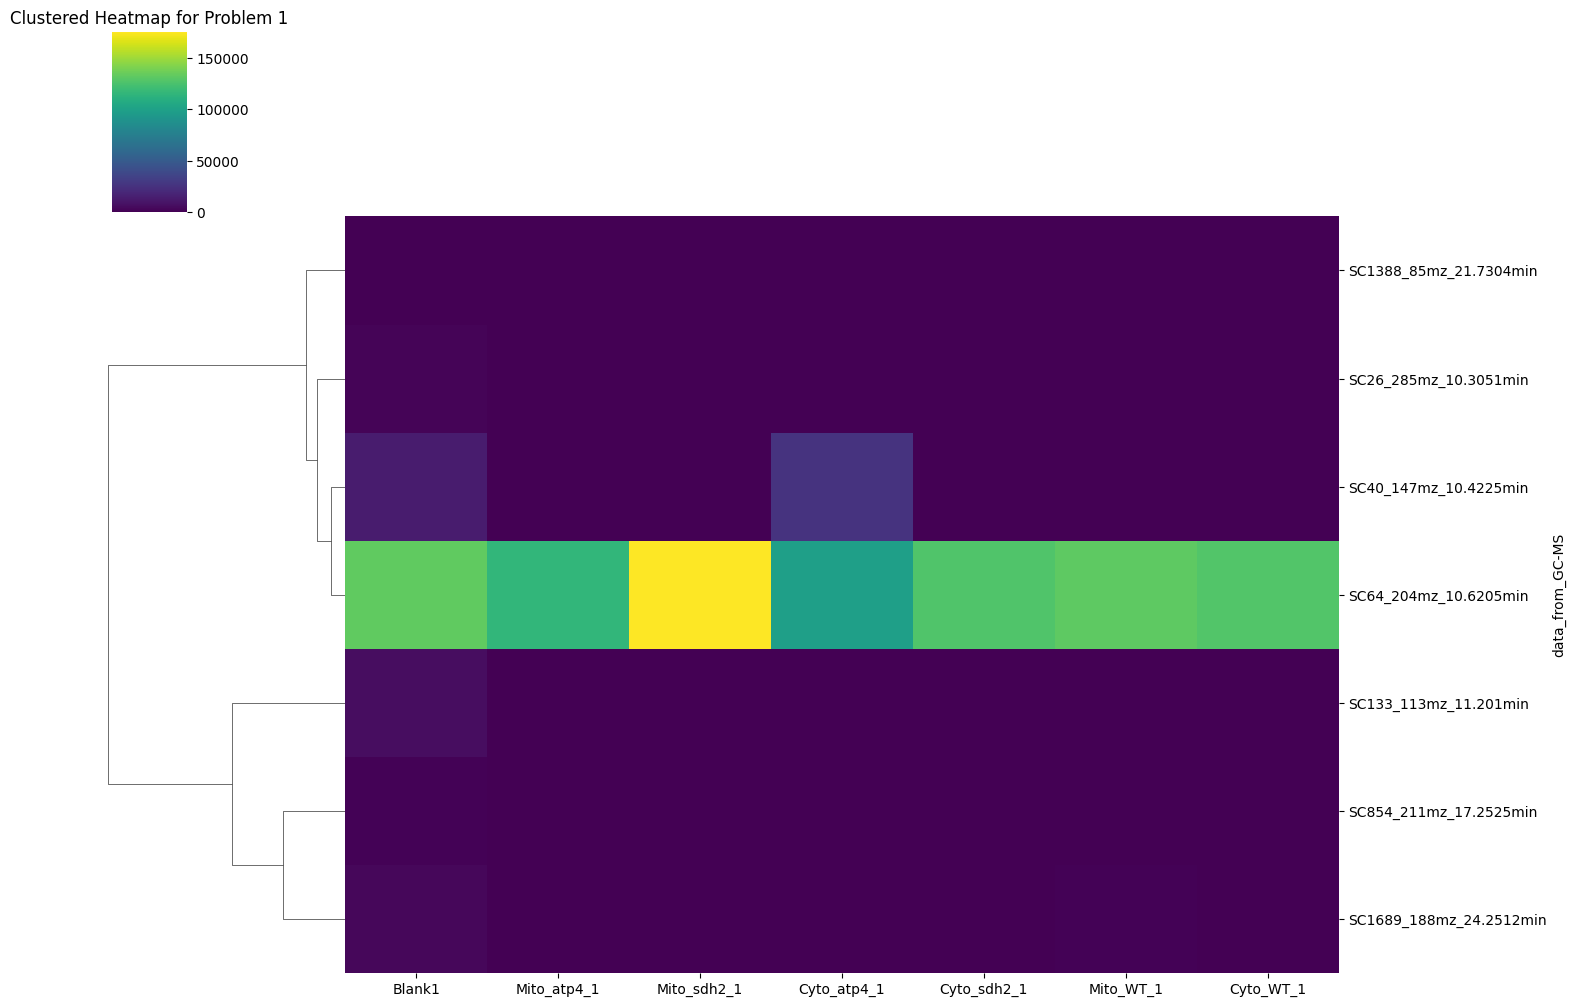

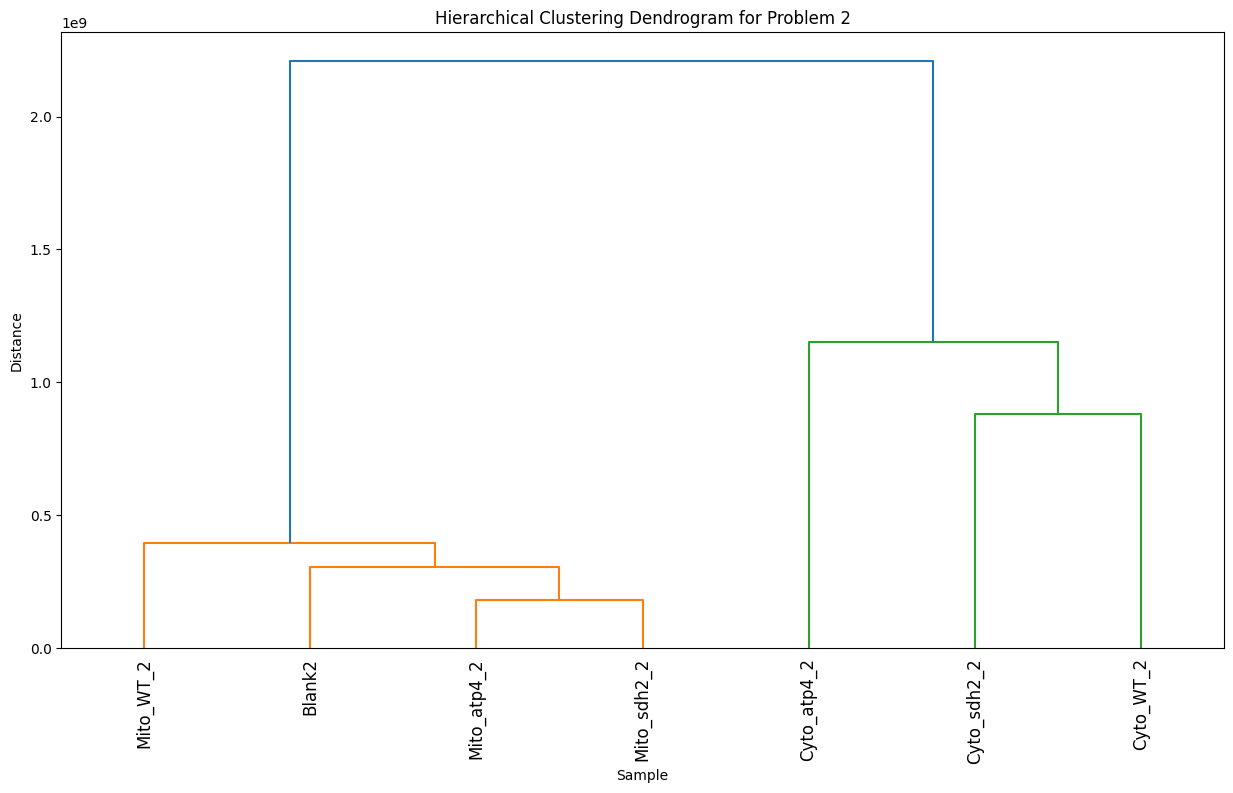

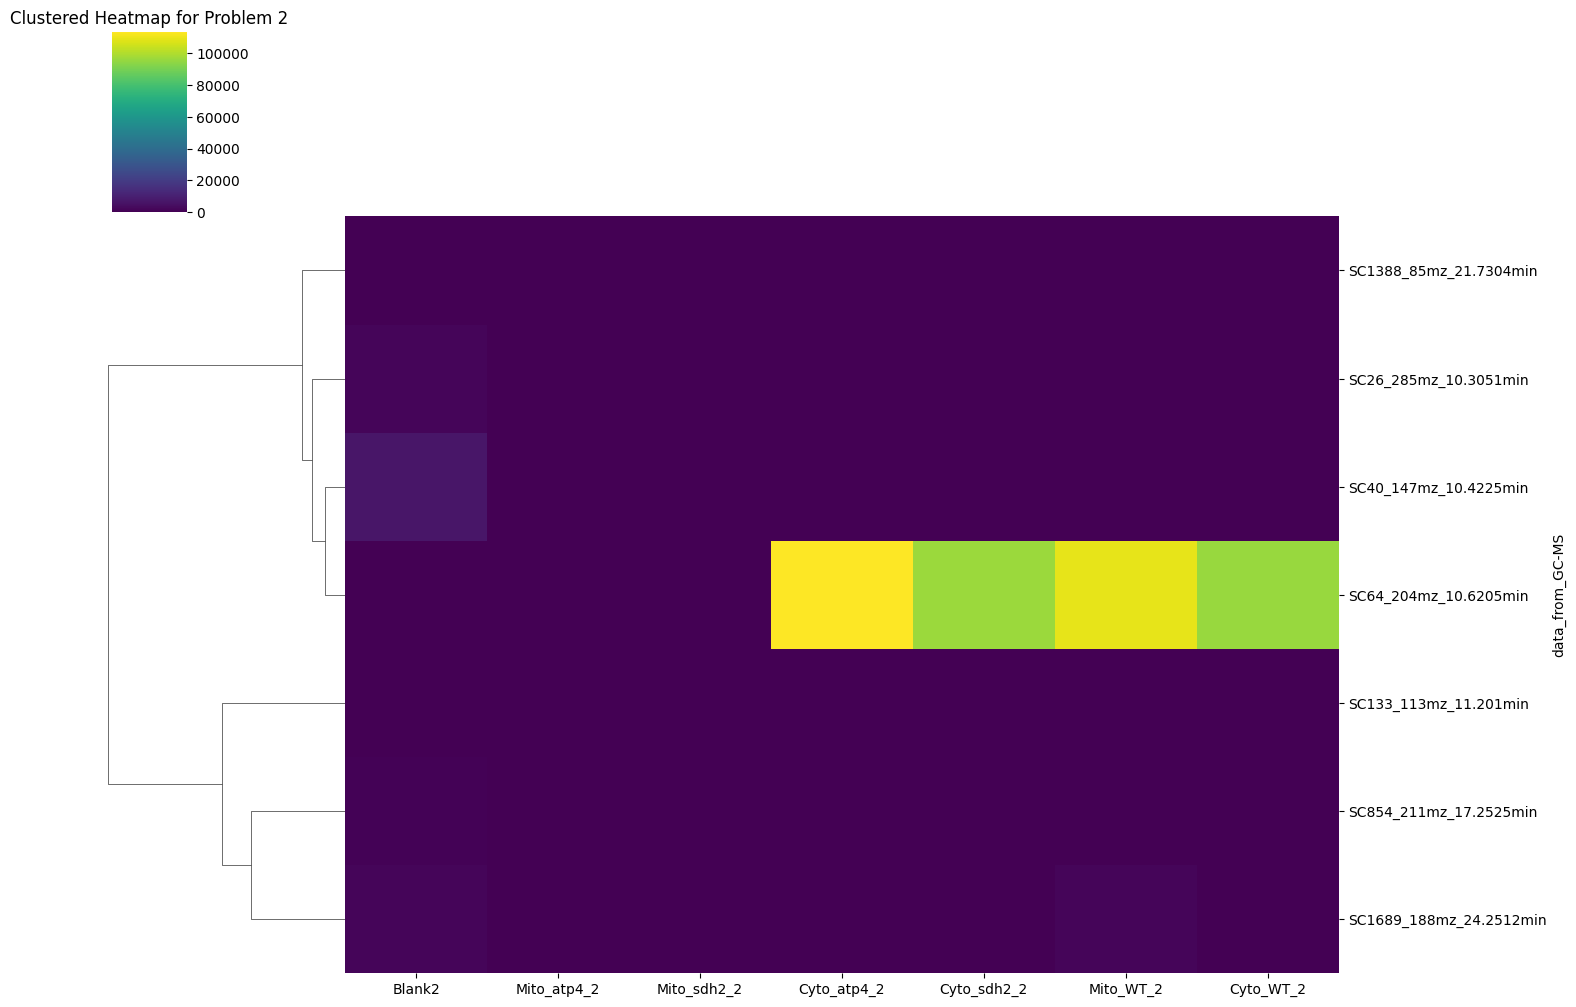

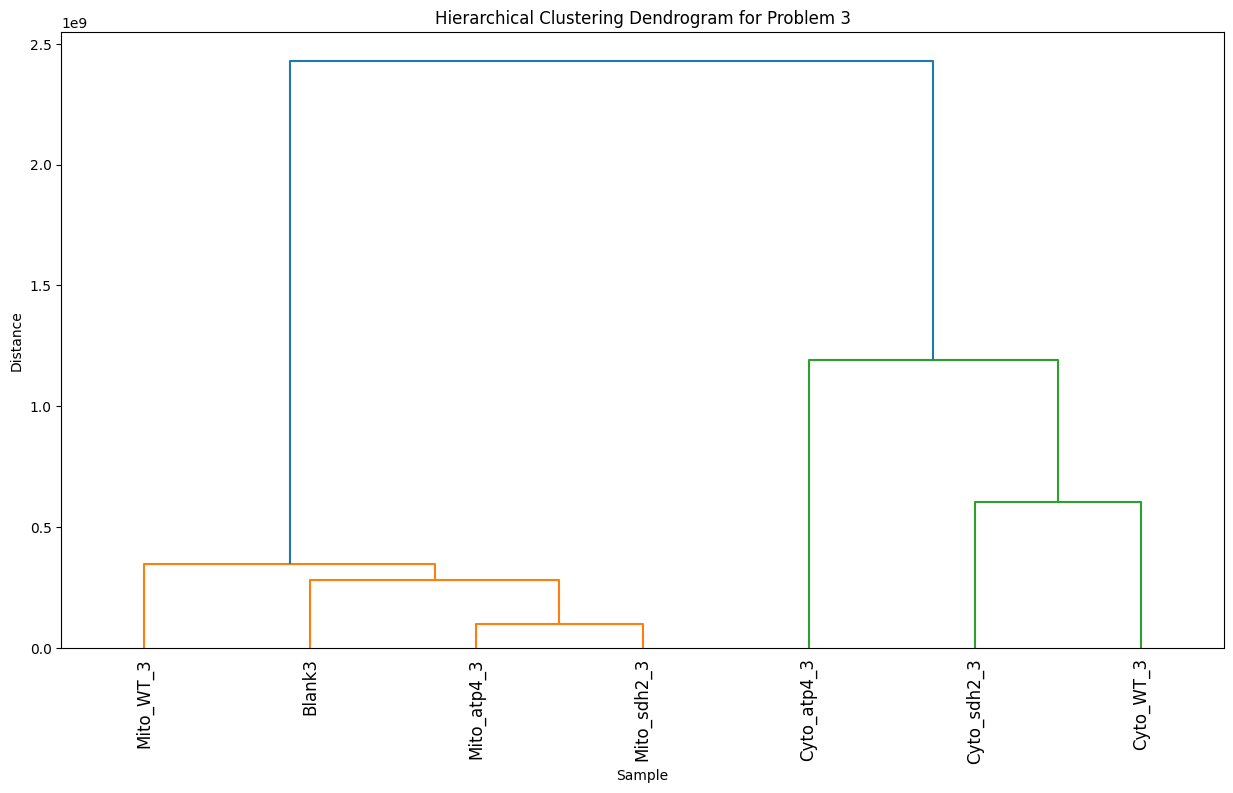

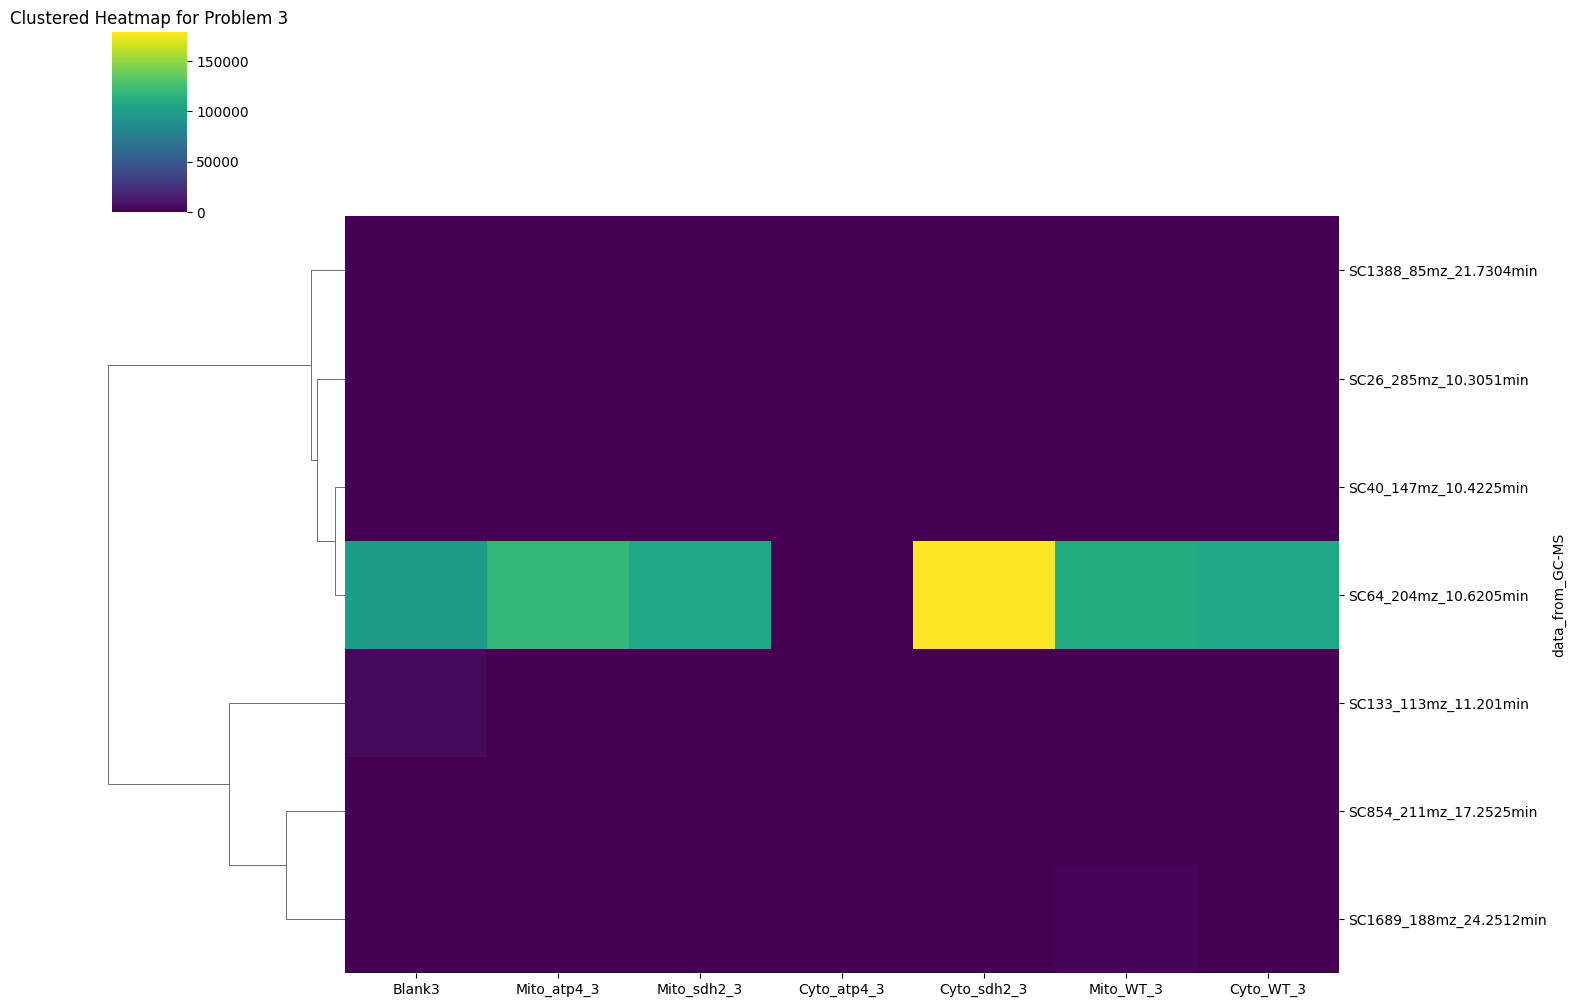

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Create a list to store the DataFrames and their names
problems = [(prob_1, "Problem 1"), (prob_2, "Problem 2"), (prob_3, "Problem 3")]

# Iterate through the problems
for df, problem_name in problems:

    # Perform hierarchical clustering on the transposed data
    linkage_matrix = linkage(df.T, method='ward')

    # Create dendrogram
    plt.figure(figsize=(15, 8))
    dendrogram(linkage_matrix, labels=df.columns, orientation='top', leaf_rotation=90)
    plt.title(f'Hierarchical Clustering Dendrogram for {problem_name}')
    plt.xlabel('Sample')
    plt.ylabel('Distance')
    plt.show()

    # Create clustered heatmap
    sns.clustermap(df, cmap='viridis', figsize=(15, 10), row_linkage=linkage_matrix, col_cluster=False)
    plt.title(f'Clustered Heatmap for {problem_name}')
    plt.show()


In [10]:



numeric_columns = data.columns[2:]  # Exclude 'data_from_GC-MS' and 'name' columns

# Normalizing using StandardScaler
scaler = StandardScaler()
normalized_data = data.copy()
normalized_data[numeric_columns] = scaler.fit_transform(normalized_data[numeric_columns])

# Log-transform the data
log_data = normalized_data.copy()
log_data.iloc[:, 2:] = log_data.iloc[:, 2:].apply(lambda x: np.log1p(x))

In [15]:

# Extract and preprocess data
compound_ids = data.iloc[:, 0:2]
data_values = data.iloc[:, 2:]

# Normalize the data (Total Ion Current normalization)
normalized_data = data_values.div(data_values.sum(axis=0), axis=1)

# Log-transform the data
log_data = np.log1p(normalized_data)

In [29]:

compound_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   data_from_GC-MS  3359 non-null   object
 1   name             3359 non-null   object
dtypes: object(2)
memory usage: 52.6+ KB


In [84]:
log_data

,Blank1,Blank2,Blank3,Mito_atp4_1,Mito_atp4_2,Mito_atp4_3,Mito_sdh2_1,Mito_sdh2_2,Mito_sdh2_3,Cyto_atp4_1,...,Mito_WT_2,Mito_WT_3,Cyto_WT_1,Cyto_WT_2,Cyto_WT_3,last_col,PC1,PC2,PCA1,PCA2
0,0.000006,0.000007,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001275,0.000171,-0.001803,0.000241
1,0.000058,0.000032,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000004,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000321,-0.001256,0.000204,-0.001776,0.000289
2,0.000589,0.000000,0.000484,0.000111,0.0,0.000136,0.000198,0.0,0.000116,0.000016,...,0.000072,0.0001,0.000017,0.000015,0.000017,0.000043,-0.000791,0.000611,-0.001119,0.000865
3,0.000025,0.000000,0.000022,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001267,0.000186,-0.001792,0.000263
4,0.000005,0.000003,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001277,0.000168,-0.001805,0.000238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001278,0.000165,-0.001808,0.000233
3355,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001278,0.000165,-0.001808,0.000233
3356,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001278,0.000165,-0.001808,0.000233
3357,0.000000,0.000000,0.000000,0.000007,0.0,0.000000,0.000009,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000321,-0.001274,0.000165,-0.001802,0.000234


In [68]:

# Defining comparisons on column names
comparisons = [
    ('Mito_atp4_1', 'Mito_WT_1'),
    ('Mito_atp4_2', 'Mito_WT_2'),
    ('Mito_atp4_3', 'Mito_WT_3'),
    ('Mito_sdh2_1', 'Mito_WT_1'),
    ('Mito_sdh2_2', 'Mito_WT_2'),
    ('Mito_sdh2_3', 'Mito_WT_3'),
    ('Cyto_atp4_1', 'Cyto_WT_1'),
    ('Cyto_atp4_2', 'Cyto_WT_2'),
    ('Cyto_atp4_3', 'Cyto_WT_3'),
    ('Cyto_sdh2_1', 'Cyto_WT_1'),
    ('Cyto_sdh2_2', 'Cyto_WT_2'),
    ('Cyto_sdh2_3', 'Cyto_WT_3')
]

# differential analysis
all_results_wilcoxon = pd.DataFrame(columns=['Compound_ID', 'p-value', 'Comparison'])
for comp in comparisons:
    group1_values = log_data[comp[0]].values
    group2_values = log_data[comp[1]].values
    _, p_val = wilcoxon(group1_values, group2_values)
    results = pd.DataFrame({'Compound_ID': compound_ids['data_from_GC-MS'], 'p-value': p_val, 'Comparison': f"{comp[0]} vs {comp[1]}"})
    all_results_wilcoxon = pd.concat([all_results_wilcoxon, results])

# Adjust p-values for multiple testing (Benjamini-Hochberg)
all_results_wilcoxon['adjusted_p-value'] = sm.multipletests(all_results_wilcoxon['p-value'], method='fdr_bh')[1]

# Filter significant results
significant_results_wilcoxon = all_results_wilcoxon[all_results_wilcoxon['adjusted_p-value'] < 0.05]

# Get the compound IDs of significant results from Wilcoxon test
significant_compounds_wilcoxon = significant_results_wilcoxon['Compound_ID']


# Output significant results
print("Significant results using Wilcoxon signed-rank test:")
significant_results_wilcoxon


Significant results using Wilcoxon signed-rank test:


,Compound_ID,p-value,Comparison,adjusted_p-value
0,SC26_285mz_10.3051min,0.009456,Mito_atp4_3 vs Mito_WT_3,0.014184
1,SC40_147mz_10.4225min,0.009456,Mito_atp4_3 vs Mito_WT_3,0.014184
2,SC64_204mz_10.6205min,0.009456,Mito_atp4_3 vs Mito_WT_3,0.014184
3,SC133_113mz_11.201min,0.009456,Mito_atp4_3 vs Mito_WT_3,0.014184
4,SC854_211mz_17.2525min,0.009456,Mito_atp4_3 vs Mito_WT_3,0.014184
...,...,...,...,...
3354,SC3805_129mz_42.0007min,0.000412,Cyto_sdh2_3 vs Cyto_WT_3,0.000823
3355,SC3838_73mz_42.2826min,0.000412,Cyto_sdh2_3 vs Cyto_WT_3,0.000823
3356,SC3846_309mz_42.3539min,0.000412,Cyto_sdh2_3 vs Cyto_WT_3,0.000823
3357,SC4191_159mz_45.2421min,0.000412,Cyto_sdh2_3 vs Cyto_WT_3,0.000823


In [96]:
significant_compounds

0         SC26_285mz_10.3051min
1         SC40_147mz_10.4225min
2         SC64_204mz_10.6205min
3         SC133_113mz_11.201min
4        SC854_211mz_17.2525min
                 ...           
3354    SC3805_129mz_42.0007min
3355     SC3838_73mz_42.2826min
3356    SC3846_309mz_42.3539min
3357    SC4191_159mz_45.2421min
3358     SC4279_73mz_45.9828min
Name: Compound_ID, Length: 26872, dtype: object

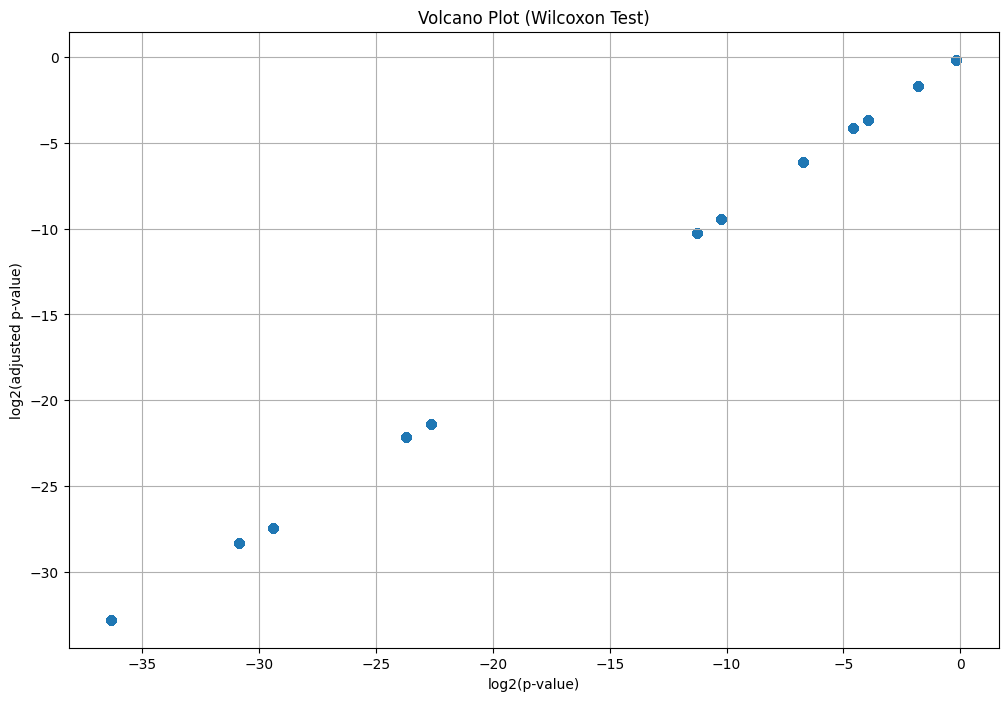

In [99]:

#visual
plt.figure(figsize=(12, 8))
plt.scatter(np.log2(all_results_wilcoxon['p-value']), np.log2(all_results_wilcoxon['adjusted_p-value']))
plt.xlabel('log2(p-value)')
plt.ylabel('log2(adjusted p-value)')
plt.title('Volcano Plot (Wilcoxon Test)')
plt.grid(True)
plt.show()


In [100]:

#op differentially expressed compounds

top_n = 10
top_significant_results_wilcoxon = significant_results_wilcoxon.sort_values('adjusted_p-value').head(top_n)
print(f"\nTop {top_n} differentially expressed compounds (Wilcoxon test):")
print(top_significant_results_wilcoxon.to_markdown(index=False, numalign="left", stralign="left"))




Top 10 differentially expressed compounds (Wilcoxon test):
| Compound_ID             | p-value     | Comparison               | adjusted_p-value   |
|:------------------------|:------------|:-------------------------|:-------------------|
| SC2788_158mz_33.4718min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC3583_341mz_40.1416min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC3657_174mz_40.7624min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC3963_578mz_43.3318min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC4525_324mz_48.0437min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC4539_324mz_48.1611min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC4652_305mz_49.1116min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC4684_315mz_49.3767min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC5417_365mz_55.5272min | 1.13683e-11 

In [110]:
log_data_columns = list(log_data.columns)
print(log_data_columns)

['Blank1', 'Blank2', 'Blank3', 'Mito_atp4_1', 'Mito_atp4_2', 'Mito_atp4_3', 'Mito_sdh2_1', 'Mito_sdh2_2', 'Mito_sdh2_3', 'Cyto_atp4_1', 'Cyto_atp4_2', 'Cyto_atp4_3', 'Cyto_sdh2_1', 'Cyto_sdh2_2', 'Cyto_sdh2_3', 'Mito_WT_1', 'Mito_WT_2', 'Mito_WT_3', 'Cyto_WT_1', 'Cyto_WT_2', 'Cyto_WT_3', 'last_col', 'PC1', 'PC2', 'PCA1', 'PCA2']


In [113]:
significant_compounds_wilcoxon

0         SC26_285mz_10.3051min
1         SC40_147mz_10.4225min
2         SC64_204mz_10.6205min
3         SC133_113mz_11.201min
4        SC854_211mz_17.2525min
                 ...           
3354    SC3805_129mz_42.0007min
3355     SC3838_73mz_42.2826min
3356    SC3846_309mz_42.3539min
3357    SC4191_159mz_45.2421min
3358     SC4279_73mz_45.9828min
Name: Compound_ID, Length: 26872, dtype: object

<ipython-input-82-daf4cc85920e>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=principal_df, x='PC1', y='PC2', palette='viridis')


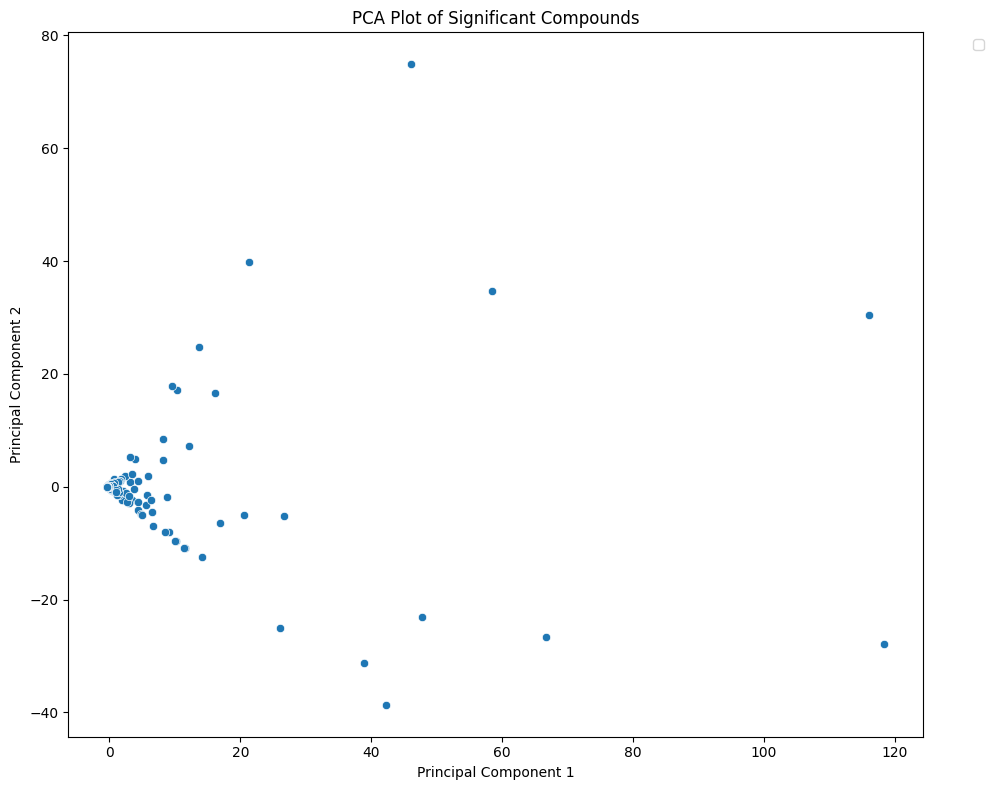

In [82]:

# features (compound abundances)
features = log_data.iloc[:, 1:]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
#plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', palette='viridis')
plt.title('PCA Plot of Significant Compounds')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
